# Linear Regression for Moscow Housing Prices

## Objective
In this notebook, I aim to implement and evaluate a **Linear Regression model** to predict house prices using the Moscow housing dataset. The notebook will involve data preprocessing, exploratory data analysis, and model training/testing.

## Importing Necessary Libraries
The following libraries are imported for various tasks:
- **numpy** and **pandas**: For data manipulation and numerical computations.
- **matplotlib** and **seaborn**: For visualizing data and insights through plots.
- **sklearn.preprocessing**: To preprocess the data, including scaling and encoding.
- **sklearn.model_selection**: For splitting the data into training and testing sets.
- **sklearn.metrics**: To evaluate model performance using error metrics like Mean Squared Error (MSE) and Mean Absolute Error (MAE).
- **sklearn.linear_model**: To use the `LinearRegression` model from scikit-learn.

## Loading and Exploring the Dataset
The dataset is loaded from a CSV file (`data.csv`) into a DataFrame (`cal_df`):
- **`cal_df.describe()`**: Provides summary statistics of the dataset.
- **`cal_df.isnull().sum()`**: Identifies missing values in the dataset.

In the following steps, I will preprocess the data, explore its structure, and build a Linear Regression model to prdict house prices.


In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt

cal_df = pd.read_csv("data.csv")

# Apply currency conversion(russian rubles to euro) and change from scientific notation to better visual interpretation
conversion_rate = 0.012  
cal_df['Price'] = cal_df['Price'] * conversion_rate
pd.options.display.float_format = '{:,.2f}'.format


print("Updated dataset statistics (Price in Euros):")
print(cal_df.describe())
cal_df.isnull().sum()

Updated dataset statistics (Price in Euros):
              Price  Minutes to metro  Number of rooms      Area  Living area  \
count     22,676.00         22,676.00        22,676.00 22,676.00    22,676.00   
mean     433,455.86             11.89             2.04     71.97        38.52   
std      993,907.37              6.20             1.52     68.37        38.12   
min       13,800.00              0.00             0.00      6.00         2.00   
25%       84,817.39              7.00             1.00     37.40        17.60   
50%      136,118.40             11.00             2.00     53.30        28.50   
75%      297,590.97             15.00             3.00     77.14        43.20   
max   29,460,240.00             60.00            12.00  1,117.00       566.80   

       Kitchen area     Floor  Number of floors  
count     22,676.00 22,676.00         22,676.00  
mean          12.59      9.19             16.56  
std            7.73      7.55              9.78  
min            1.00      

Price               0
Apartment type      0
Metro station       0
Minutes to metro    0
Region              0
Number of rooms     0
Area                0
Living area         0
Kitchen area        0
Floor               0
Number of floors    0
Renovation          0
dtype: int64

### Encoding Categorical Variables
To make the categorical variables usable by the Linear Regression model, we applied **Label Encoding** to the following columns:
- **`Apartment type`**
- **`Renovation`**
- **`Metro station`**
- **`Region`**

Label Encoding converts each category in these columns into a unique integer. For example:
- `Apartment type`: ["Studio", "1-bedroom", "2-bedroom"] → [0, 1, 2]

After encoding, these columns are now numeric and suitable for use in the regression model. We verified the changes using `cal_df.info()` to ensure the data types are updated.

In [4]:
LE = LabelEncoder()
cal_df['Apartment type'] = LE.fit_transform(cal_df['Apartment type'])
cal_df['Renovation'] = LE.fit_transform(cal_df['Renovation'])
cal_df['Metro station'] = LE.fit_transform(cal_df['Metro station'])
cal_df['Region'] = LE.fit_transform(cal_df['Region'])

print(cal_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             22676 non-null  float64
 1   Apartment type    22676 non-null  int32  
 2   Metro station     22676 non-null  int32  
 3   Minutes to metro  22676 non-null  float64
 4   Region            22676 non-null  int32  
 5   Number of rooms   22676 non-null  float64
 6   Area              22676 non-null  float64
 7   Living area       22676 non-null  float64
 8   Kitchen area      22676 non-null  float64
 9   Floor             22676 non-null  float64
 10  Number of floors  22676 non-null  int64  
 11  Renovation        22676 non-null  int32  
dtypes: float64(7), int32(4), int64(1)
memory usage: 1.7 MB
None


In [5]:
print(cal_df.dtypes)

Price               float64
Apartment type        int32
Metro station         int32
Minutes to metro    float64
Region                int32
Number of rooms     float64
Area                float64
Living area         float64
Kitchen area        float64
Floor               float64
Number of floors      int64
Renovation            int32
dtype: object


### Standardizing Data
To ensure all features are on the same scale, we applied **Standardization** to the dataset using `StandardScaler`.
This process transforms each feature so that:
- The **mean** is 0.
- The **standard deviation** is 1.

Steps:
1. Extracted column names from the dataset to retain them after scaling.
2. Used `StandardScaler` to scale all numerical columns in the DataFrame.
3. Converted the scaled data back into a DataFrame with the original column names for clarity.

In [7]:
names = cal_df.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cal_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.head()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
0,-0.360057,0.850969,-1.530310,-0.949114,1.566885,-0.684669,-0.605069,-0.719189,-0.529779,2.094025,0.863466,-0.779064
1,-0.327458,0.850969,-1.470797,-1.593826,1.566885,-0.684669,-0.333009,-0.485737,-0.335677,-0.422588,-0.159125,0.991970
2,-0.302224,0.850969,-1.742855,0.340311,1.566885,-0.684669,-0.398830,-0.585413,0.065466,0.107226,0.863466,-0.779064
3,-0.335910,0.850969,-1.003196,-0.626758,1.566885,-0.684669,-0.539248,-0.590659,-0.206276,0.372132,1.681539,0.991970
4,-0.358246,0.850969,-1.530310,-0.949114,1.566885,-0.684669,-0.501218,-0.611644,-1.112084,-0.555041,-1.181716,1.877487


In [8]:
names = cal_df.columns
scaler = StandardScaler()
scaled_df = scaler.fit_transform(cal_df)
scaled_df = pd.DataFrame(scaled_df, columns=names)
scaled_df.tail()

,Price,Apartment type,Metro station,Minutes to metro,Region,Number of rooms,Area,Living area,Kitchen area,Floor,Number of floors,Renovation
22671,-0.378545,-1.175131,0.238072,-0.626758,1.566885,-1.341030,-0.588248,-0.669351,-0.982683,-0.687494,0.045393,-0.779064
22672,-0.364887,-1.175131,0.025527,2.113269,1.566885,-0.684669,-0.590442,-0.745419,-0.050995,0.239679,-0.159125,-0.779064
22673,-0.391449,-1.175131,0.238072,2.919159,1.566885,-1.341030,-0.789368,-0.616890,-0.581540,1.034399,0.045393,-0.779064
22674,-0.366470,-1.175131,0.051032,0.340311,1.566885,-0.028308,-0.520379,-0.433276,-0.775641,0.372132,-0.261384,-0.779064
22675,-0.353548,-1.175131,0.238072,-0.626758,1.566885,-0.028308,-0.231644,-0.170970,-0.982683,0.107226,0.045393,-0.779064


### Data Visualization
- **Boxplots**: Generated boxplots for each column in the standardized dataset to identify outliers and understand feature distributions.
- **Histograms**:
  - Plotted the distribution of the target variable (`Price`) before and after standardization to compare changes in lsce.


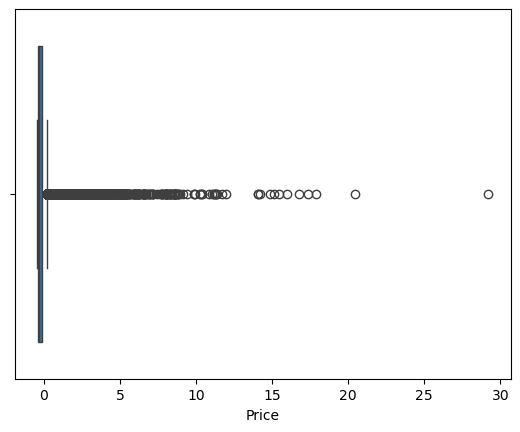

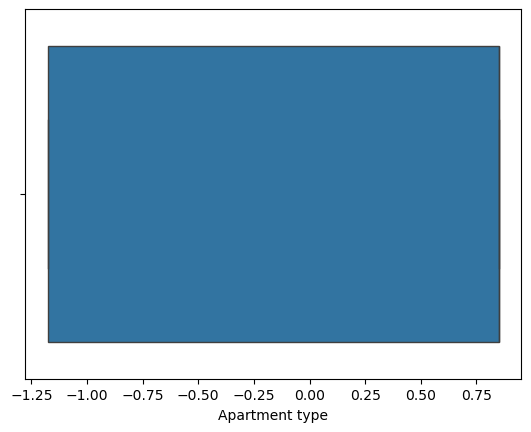

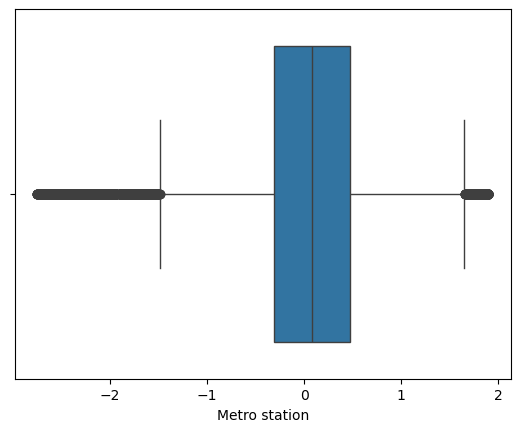

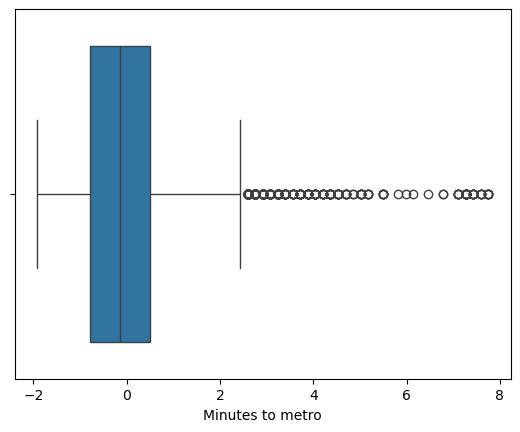

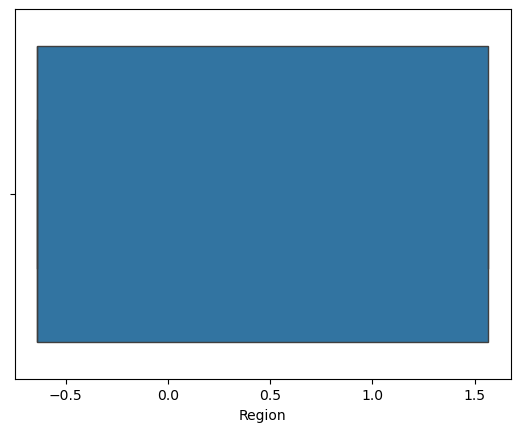

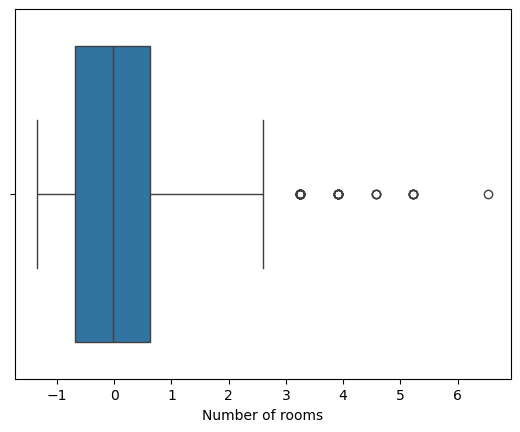

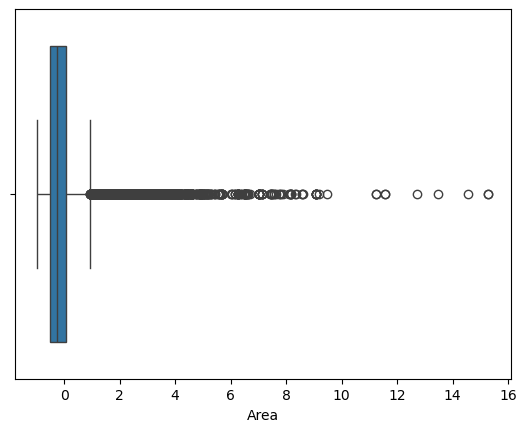

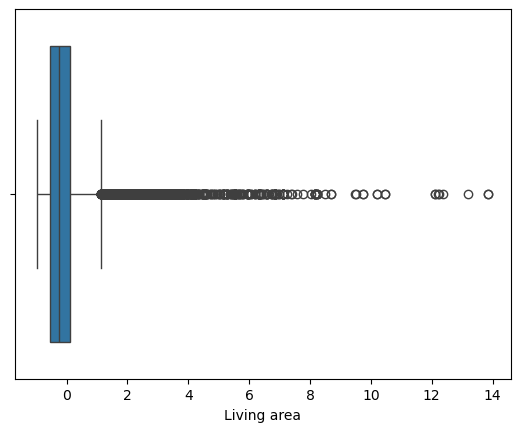

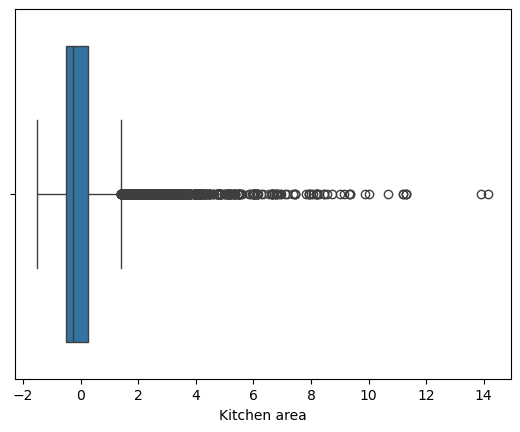

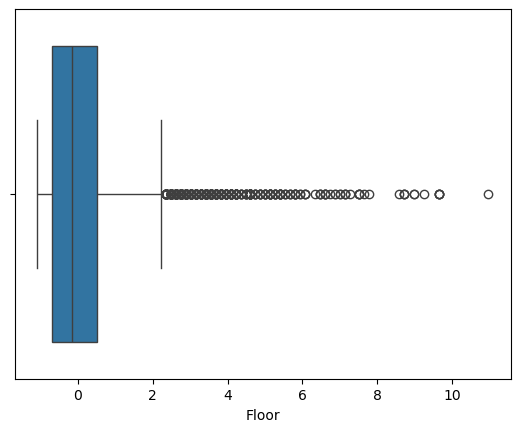

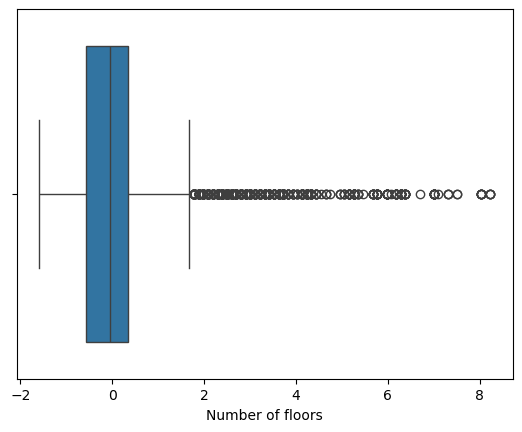

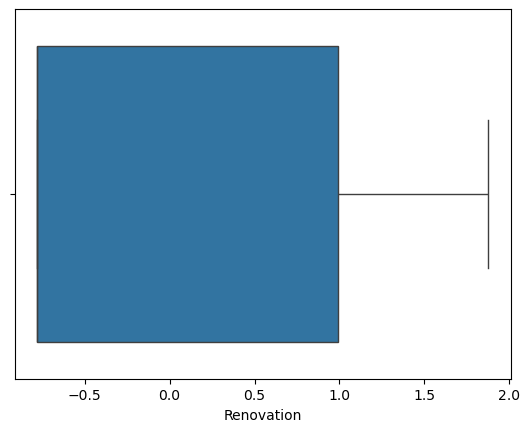

In [10]:
for column in scaled_df:
    plt.figure()
    sns.boxplot(x=scaled_df[column])

<Axes: >

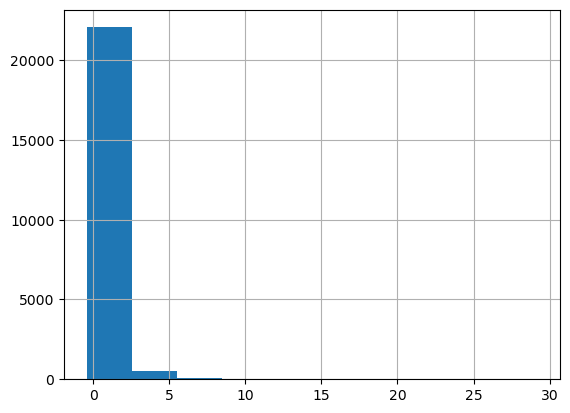

In [11]:
scaled_df['Price'].hist()

<Axes: >

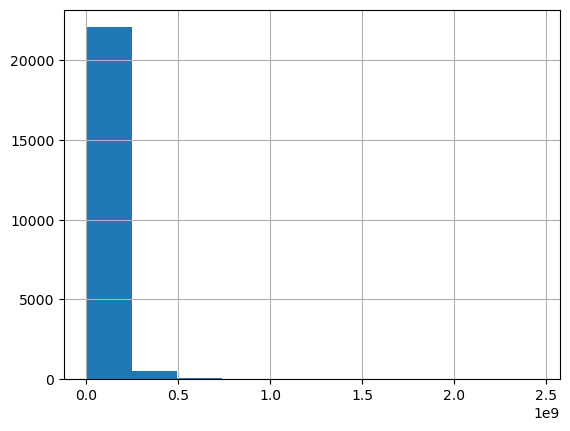

In [12]:
cal_df['Price'].hist()

### Splitting Features and Target
- **Features (`X`)**: Extracted all columns except `Price` as predictors.
  - Verified using `X.info()` and checked the shape with `X.shape`.
- **Target (`y`)**: Selected the `Price` column as the target variable.
  - Used `y.describe()` to view summary statistics and `y.shape` to confirm its size.

In [14]:
X = scaled_df.drop('Price', axis = 1)
print (X.info())
print (X.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22676 entries, 0 to 22675
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Apartment type    22676 non-null  float64
 1   Metro station     22676 non-null  float64
 2   Minutes to metro  22676 non-null  float64
 3   Region            22676 non-null  float64
 4   Number of rooms   22676 non-null  float64
 5   Area              22676 non-null  float64
 6   Living area       22676 non-null  float64
 7   Kitchen area      22676 non-null  float64
 8   Floor             22676 non-null  float64
 9   Number of floors  22676 non-null  float64
 10  Renovation        22676 non-null  float64
dtypes: float64(11)
memory usage: 1.9 MB
None
(22676, 11)


In [15]:
y = scaled_df['Price']

print (y.describe())
print (y.shape)

count    22676.000000
mean         0.000000
std          1.000022
min         -0.422238
25%         -0.350783
50%         -0.299167
75%         -0.136701
max         29.205362
Name: Price, dtype: float64
(22676,)


In [16]:
X_train,X_test,Y_train,Y_test = train_test_split(X,y,test_size=0.20, random_state=1)
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(18140, 11)
(18140,)
(4536, 11)
(4536,)


### Linear Regression Model Training and Evaluation
- **Model Training**:
  - Trained a Linear Regression model using the training data (`X_train` and `Y_train`).

- **Model Evaluation**:
  - Calculated the following metrics on the test set:
    - **R-Squared**: Measures the proportion of variance in the target variable explained by the model.
    - **Mean Squared Error (MSE)**: Evaluates the average squared difference between predicted and actual values.
    - **Mean Absolute Error (MAE)**: Measures the average absolute difference between predictions and actual values.

- **Coefficients**:
  - Printed the coefficients (`beta`) for each feature, representing their impact on the target variable (`Price`).

In [18]:
model = linear_model.LinearRegression()
model.fit(X_train, Y_train)
print("R-Sqaured: %.3f"
      % model.score(X_test,Y_test))

Y_pred = model.predict(X_test) 
print("Mean squared error: %.3f"
      % mean_squared_error(Y_test, Y_pred)) 

print("Mean absolute error: %.3f"
      % mean_absolute_error(Y_test, Y_pred))


for i, col_name in enumerate(X_train.columns):
    print("The coefficient (beta_{}) for {} is {}".format(i, col_name, model.coef_[i]))

R-Sqaured: 0.644
Mean squared error: 0.274
Mean absolute error: 0.232
The coefficient (beta_0) for Apartment type is 0.10602864471423806
The coefficient (beta_1) for Metro station is -0.004194752272126456
The coefficient (beta_2) for Minutes to metro is -0.04254091017842436
The coefficient (beta_3) for Region is -0.006007951051752558
The coefficient (beta_4) for Number of rooms is -0.12306054410404957
The coefficient (beta_5) for Area is 0.8963354512461471
The coefficient (beta_6) for Living area is -0.03269025034358004
The coefficient (beta_7) for Kitchen area is 0.006241192689653782
The coefficient (beta_8) for Floor is -0.002754450663587907
The coefficient (beta_9) for Number of floors is -0.05841274159074279
The coefficient (beta_10) for Renovation is -0.036288073986962974


### Feature Selection and Simplified Model Training

#### Objective:
In this section, we aim to simplify the Linear Regression model by selecting the **most informative features** and retraining the model. This process helps to:
- Identify the features that contribute the most to predicting the target variable (`Price`).
- Reduce the complexity of the model by focusing on key predictors.
- Compare the performance of the simplified model against the original model with all features.

#### Plan:
1. **Feature Selection**:
   - Use the coefficients of the initial model to determine the top 4 most important features.
   - Create subsets of the dataset containing only these selected features.

2. **Model Training and Evaluation**:
   - Retrain the Linear Regression model using only the selected features.
   - Evaluate the simplified model using R-Squared, Mean Squared Error (MSE), and Mean Absolute Error (MAE).
   - Compare the results to the original model to assess the impact of feature selection.

In [20]:
feature_importance = pd.Series(abs(model.coef_), index=X_train.columns)
top_features = feature_importance.nlargest(4).index
print("Top 4 features:", top_features)

Top 4 features: Index(['Area', 'Number of rooms', 'Apartment type', 'Number of floors'], dtype='object')


In [21]:
top_features = ['Area', 'Number of rooms', 'Apartment type', 'Number of floors']
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]
print(X_train_selected.head())
print(X_test_selected.head())

           Area  Number of rooms  Apartment type  Number of floors
10779  1.901985         1.940774        0.850969         -1.181716
19736 -0.376158        -0.028308       -1.175131          0.352171
2785   0.921981        -1.341030        0.850969          2.192834
13457 -0.254023        -0.028308       -1.175131         -0.261384
10635  1.751327         2.597134        0.850969         -1.181716
           Area  Number of rooms  Apartment type  Number of floors
6405  -0.116530        -0.028308        0.850969          0.045393
11918 -0.833249        -1.341030        0.850969         -1.181716
16681 -0.400877        -0.684669       -1.175131         -0.568161
14130 -0.315895        -0.028308       -1.175131         -0.261384
9009   0.154068         0.628052        0.850969         -1.181716


In [22]:
model.fit(X_train_selected, Y_train)

print("R-Squared (selected features): %.3f" % model.score(X_test_selected, Y_test))
Y_pred_selected = model.predict(X_test_selected)

print("Mean squared error (selected features): %.3f" % mean_squared_error(Y_test, Y_pred_selected))
print("Mean absolute error (selected features): %.3f" % mean_absolute_error(Y_test, Y_pred_selected))

R-Squared (selected features): 0.641
Mean squared error (selected features): 0.276
Mean absolute error (selected features): 0.230


### Comparing Model Performance

| **Metric**           | **All Features** | **Selected Features** |
|-----------------------|------------------|------------------------|
| **R-Squared**         | 0.644            | 0.641                 |
| **Mean Squared Error**| 0.274            | 0.276                 |
| **Mean Absolute Error**| 0.232           | 0.230                 |

#### What This Means:
- The **R-Squared** value dropped a little (0.644 to 0.641), so the new model explains slightly less of the price variation.
- The **MSE** went up a tiny bit, meaning the predictions got slightly worse.
- The **MAE** got a little better, which means the model’s average prediction error is smaller now.

#### Final Thoughts:
Using just 4 features (Area, Number of rooms, Apartment type, Number of floors) still gives pretty good results compared to using all the features. The simpler model works almost as well and is easier o understand.
